**Breast Cancer Prediction using Random Forest Classifier**

In [3]:
# Import the Libraries 
import pandas as pd
import numpy as np
file = r'breast_cancer.csv'
df=pd.read_csv(file)
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
# Delete the ID column and Label Encode the diagonosis column
from sklearn.preprocessing import LabelEncoder
df=df.drop(['id'],axis=1)
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### In diagosis result column : 
##### Malignant (M) =1
##### Benign (B) =0

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
tree=DecisionTreeClassifier(criterion='gini',random_state=0)
tree.fit(X.astype(int),y.astype(int))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

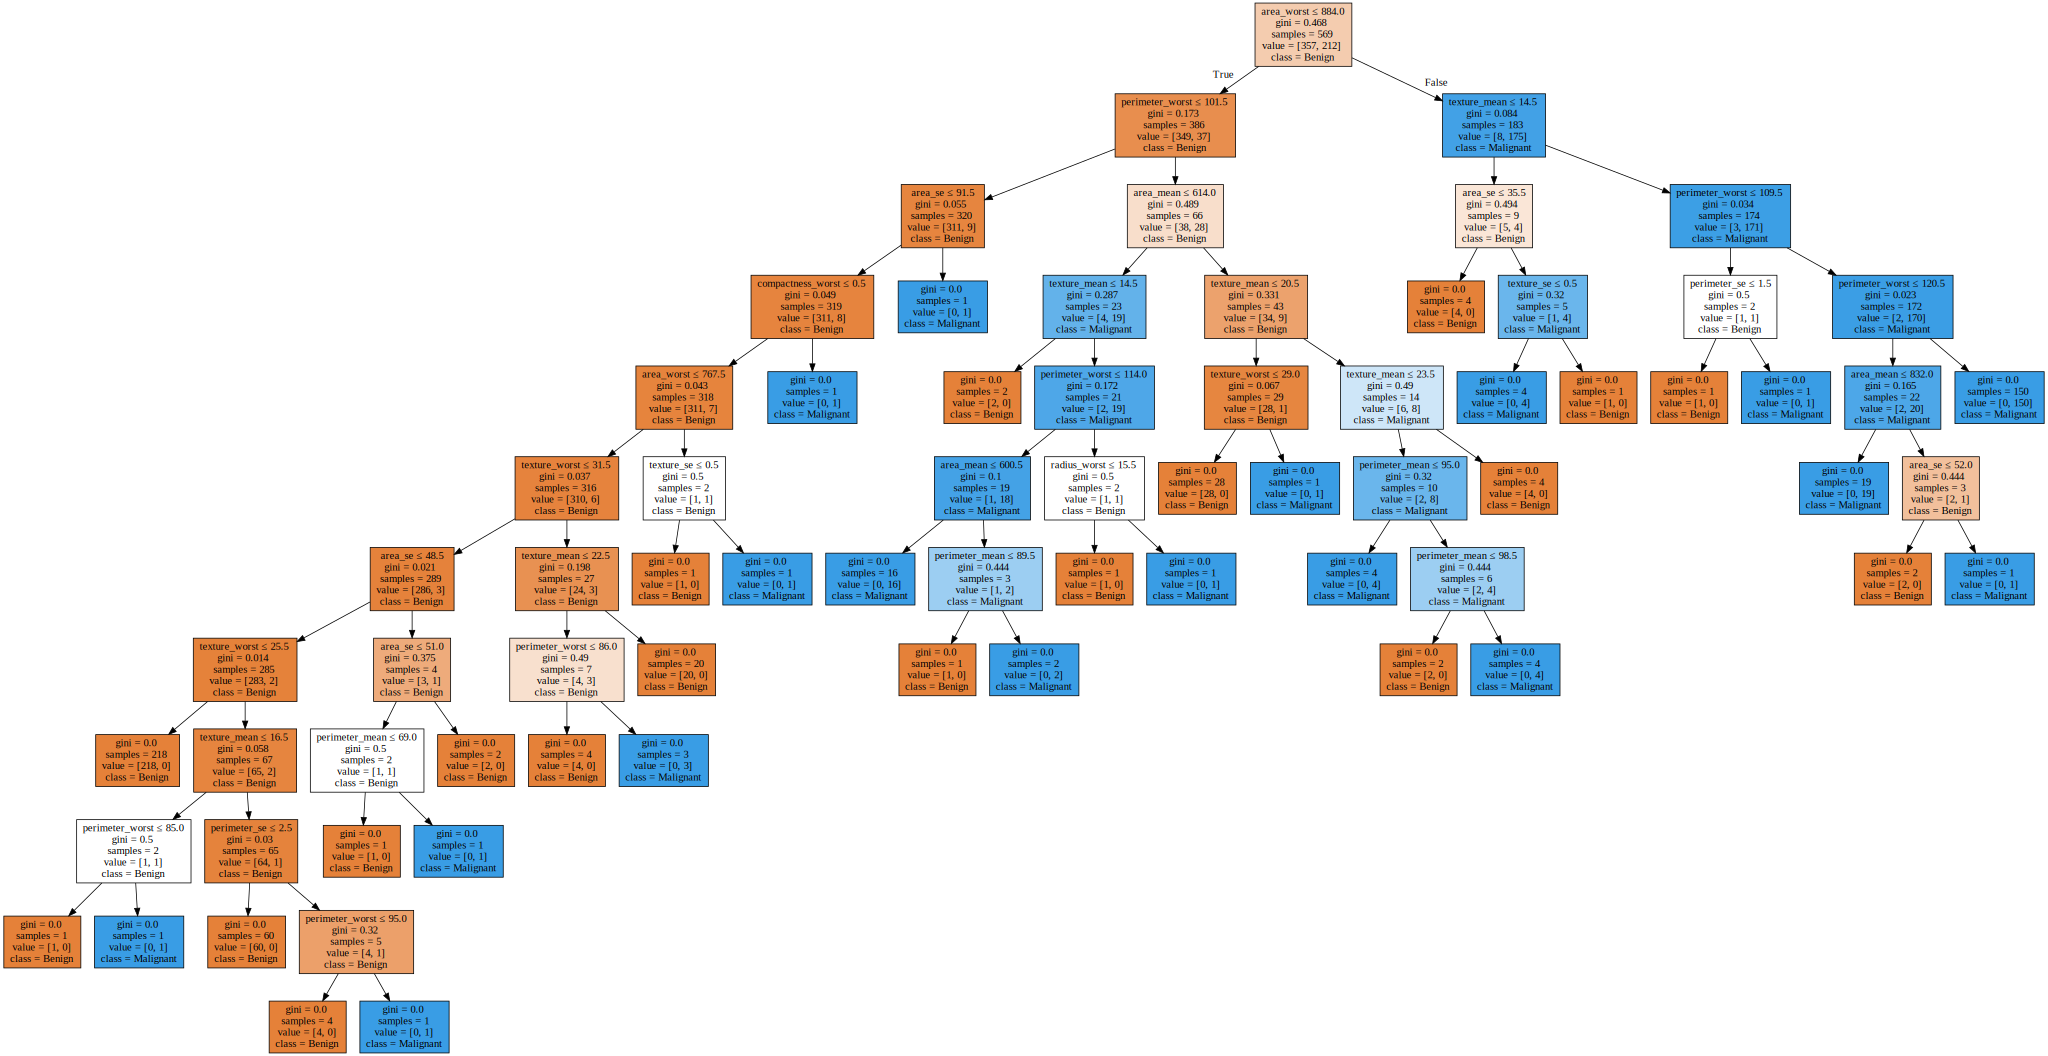

In [6]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=['Benign','Malignant'],feature_names=X.columns,filled=True,special_characters=True)

with open("mytree.dot") as f:
  dot_graph=f.read()

graphviz.Source(dot_graph)

The above Tree is just for understanding about how decision tree splits the data features. The main drawback of decision tree is overfitting


In [7]:
worst_perimeter=df[df['perimeter_worst']<=101.5]
worst_perimeter.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.023870,0.013150,0.019800,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.016980,0.006490,0.016780,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.019850,0.014210,0.020270,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.013430,0.011640,0.026710,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169
38,1,14.990,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.028990,0.1565,0.05504,1.2140,2.1880,8.077,106.000,0.006883,0.010940,0.018180,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.02899,0.1565,0.05504
41,1,10.950,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.056690,0.1895,0.06870,0.2366,1.4280,1.822,16.970,0.008064,0.017640,0.025950,0.010370,0.013570,0.003040,12.840,35.34,87.22,514.0,0.19090,0.26980,0.402300,0.14240,0.2964,0.09606
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.015880,0.005917,0.025740,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409
48,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.870,0.005488,0.014270,0.023220,0.005660,0.014280,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301


As u can refer the table above, The values where the perimeter_worst < 101 are mostly Benign and similarly as the tree splits it causes the issue of Overfitting 

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 92, stratify = y)

tree1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
tree1.fit(X_train, y_train)

print("Decision Tree Results :")
print("training set score: %f" % tree1.score(X_train, y_train))
print("test set score: %f" % tree1.score(X_test, y_test))

Decision Tree Results :
training set score: 0.988263
test set score: 0.951049


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


## **Random Forest with default parameter**

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("Random Forest Results :")
print("training set score: %f" % rf.score(X_train, y_train))
print("test set score: %f" % rf.score(X_test, y_test))

Random Forest Results :
training set score: 1.000000
test set score: 0.972028


No handles with labels found to put in legend.


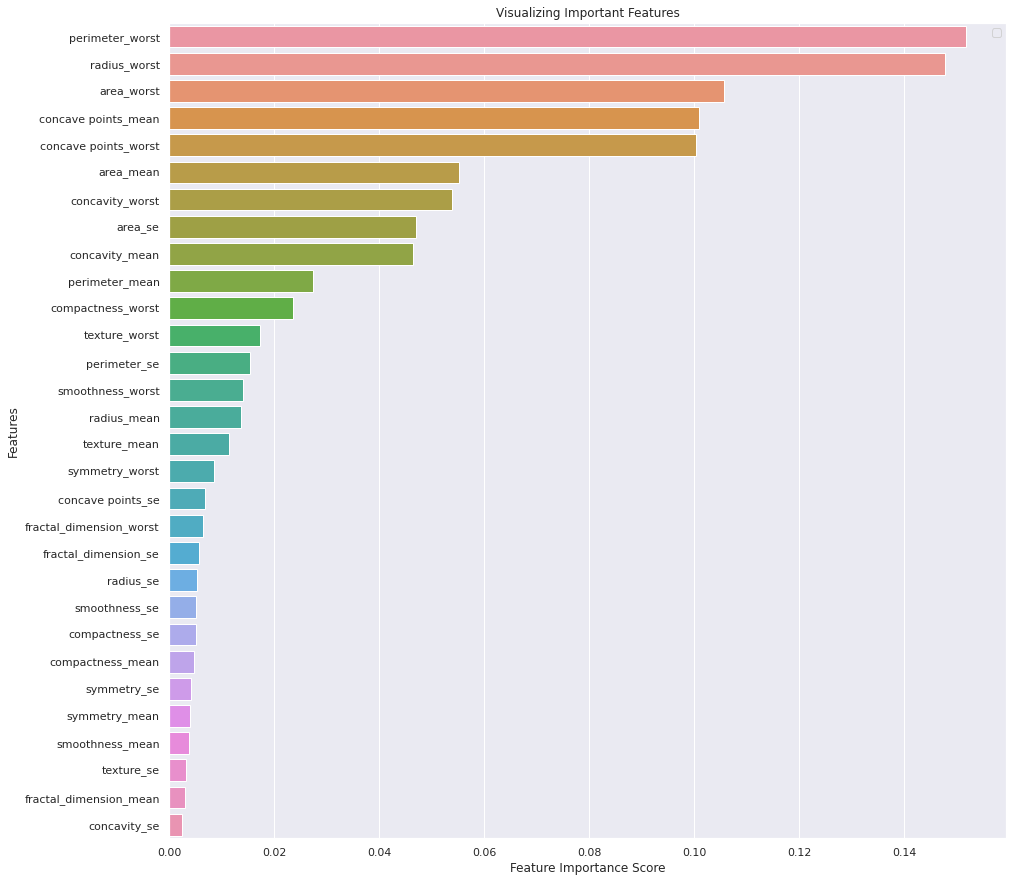

In [10]:
## Feature Importance

feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.set()
plt.figure(figsize = (15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# **Random Forest with more trees**
Lets select number of trees for Random Tree classifier that genralize the decision tress

In [14]:
best_sc=0
ntree = list(range(10,200,10))

for trees in ntree:
  rf_tree = RandomForestClassifier(n_estimators = trees,n_jobs=-1)
  rf_tree.fit(X_train,y_train)
  score=rf_tree.score(X_test,y_test)
  print("Trees =", trees, ": Score = ", score)

  if (score > best_sc):
    best_sc=score
    best_params=trees

print("\n\n Best score :{} is obtained for trees :{}".format(best_sc,best_params))



Trees = 10 : Score =  0.972027972027972
Trees = 20 : Score =  0.965034965034965
Trees = 30 : Score =  0.972027972027972
Trees = 40 : Score =  0.965034965034965
Trees = 50 : Score =  0.965034965034965
Trees = 60 : Score =  0.972027972027972
Trees = 70 : Score =  0.972027972027972
Trees = 80 : Score =  0.972027972027972
Trees = 90 : Score =  0.965034965034965
Trees = 100 : Score =  0.965034965034965
Trees = 110 : Score =  0.972027972027972
Trees = 120 : Score =  0.972027972027972
Trees = 130 : Score =  0.9790209790209791
Trees = 140 : Score =  0.972027972027972
Trees = 150 : Score =  0.965034965034965
Trees = 160 : Score =  0.972027972027972
Trees = 170 : Score =  0.972027972027972
Trees = 180 : Score =  0.965034965034965
Trees = 190 : Score =  0.972027972027972


 Best score :0.9790209790209791 is obtained for trees :130


No handles with labels found to put in legend.


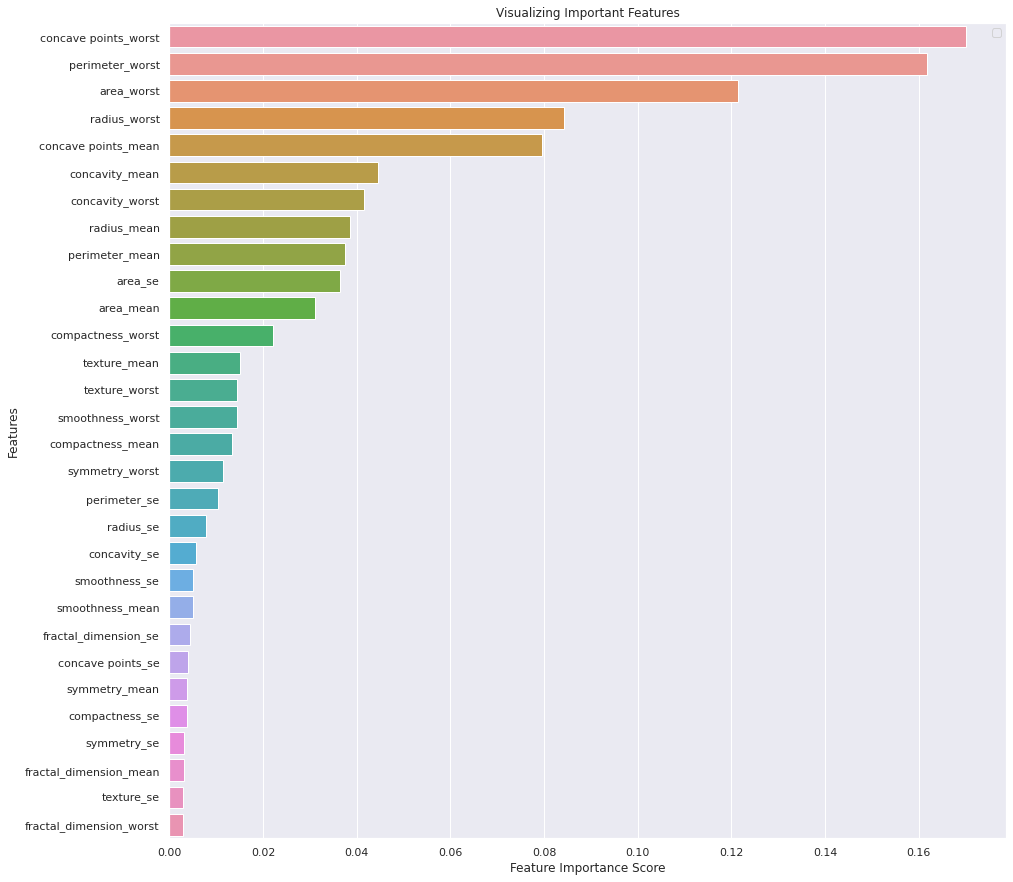

In [15]:
## Now let's see the feature importances with the number of trees = best parametes

rf_tree = RandomForestClassifier(n_estimators = best_params, n_jobs = -1)
rf_tree.fit(X_train, y_train)
## Feature Importance

feature_imp = pd.Series(rf_tree.feature_importances_,index=X.columns).sort_values(ascending=False)

sns.set()
plt.figure(figsize = (15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# **Random Forest with cross-validation**

In [17]:
from sklearn.model_selection import GridSearchCV
n_tree = list(range(50,100,10))
depth = list(range(4,7))
split = list(range(2,4))

param_grid = {'max_depth' :depth ,
              'min_samples_split' : split,
              'n_estimators' :n_tree}

rf_grid= RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(rf_grid, param_grid, cv=5, verbose=1)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   44.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [19]:
# Lets check for the best parameters
print("Best Parameters = ", grid_search_rf.best_params_)
print("Best score = ", grid_search_rf.best_score_)
print("Test Accuracy score = ", grid_search_rf.score(X_test, y_test))

Best Parameters =  {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 80}
Best score =  0.9624076607387142
Test Accuracy score =  0.965034965034965


No handles with labels found to put in legend.


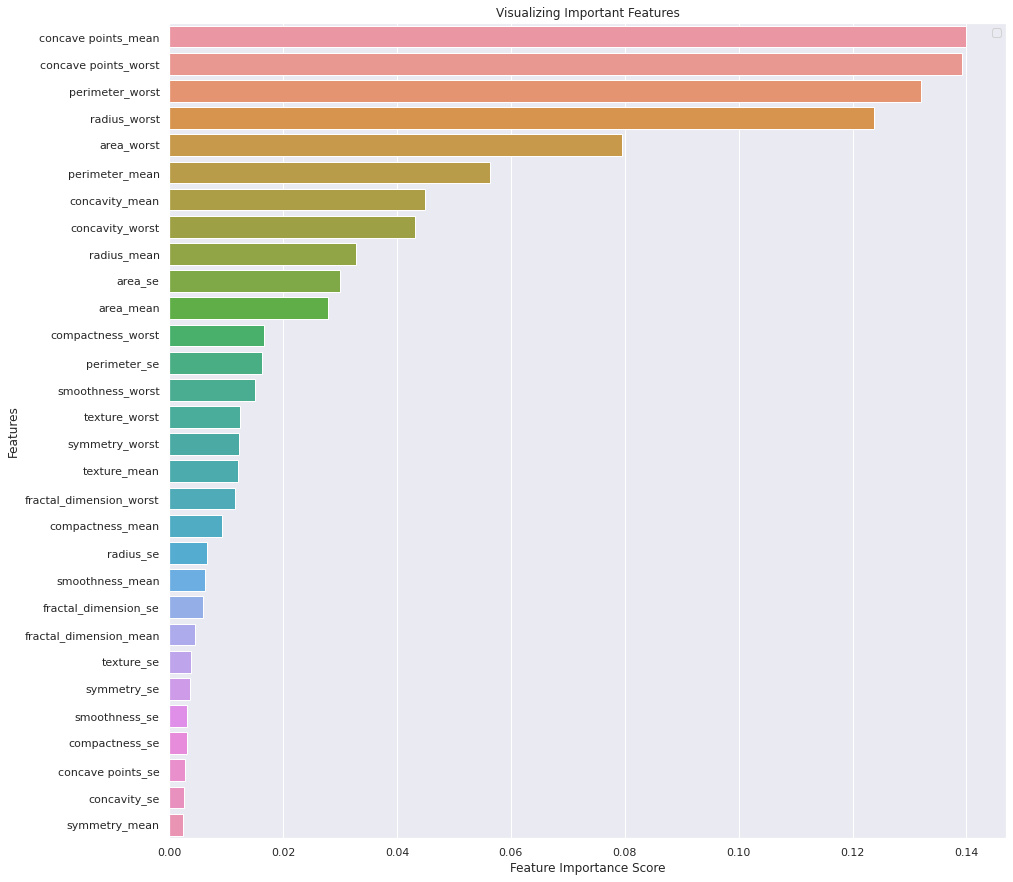

In [27]:
# Now let's create a random forest with the best parameters and lets use bootstrap
rf_best = RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini',
                                 max_depth=6,max_features='auto',max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                                 oob_score=False, random_state=None, verbose=0,
                                 warm_start=False)

rf_best.fit(X_train,y_train)

imp_feature = pd.Series(rf_best.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.set()
plt.figure(figsize = (15,15))
sns.barplot(x=imp_feature, y=imp_feature.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### **Remove the features like fractal_dimension_worst ,texture_se ,etc which are of least importance**

In [28]:
print(imp_feature)
print(imp_feature.index)

concave points_mean        0.139973
concave points_worst       0.139194
perimeter_worst            0.131989
radius_worst               0.123720
area_worst                 0.079547
perimeter_mean             0.056335
concavity_mean             0.044963
concavity_worst            0.043173
radius_mean                0.032791
area_se                    0.029934
area_mean                  0.027955
compactness_worst          0.016709
perimeter_se               0.016221
smoothness_worst           0.015128
texture_worst              0.012369
symmetry_worst             0.012217
texture_mean               0.012020
fractal_dimension_worst    0.011591
compactness_mean           0.009314
radius_se                  0.006615
smoothness_mean            0.006298
fractal_dimension_se       0.005861
fractal_dimension_mean     0.004512
texture_se                 0.003868
symmetry_se                0.003662
smoothness_se              0.003183
compactness_se             0.003063
concave points_se          0

In [29]:
drop_feature=['symmetry_mean','fractal_dimension_worst', 'compactness_mean', 'radius_se',
       'smoothness_mean', 'fractal_dimension_se', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se', 'smoothness_se', 'compactness_se',
       'concave points_se', 'concavity_se']


X_train = X_train.drop(drop_feature, axis = 1)
X_test = X_test.drop(drop_feature, axis = 1)


In [31]:
# Lets check for best params when the less features are removed
rf_grid = RandomForestClassifier(n_jobs = -1)

grid_search_rf = GridSearchCV(rf_grid, param_grid, cv=5)

grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [32]:
print("Best Parameters = ", grid_search_rf.best_params_)
print("Best score = ", grid_search_rf.best_score_)
print("Test Accuracy score = ", grid_search_rf.score(X_test, y_test))

Best Parameters =  {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 80}
Best score =  0.9670588235294119
Test Accuracy score =  0.972027972027972


No handles with labels found to put in legend.


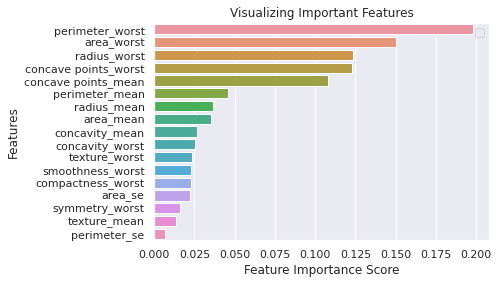

In [33]:

rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_best.fit(X_train, y_train)

feature_imp = pd.Series(rf_best.feature_importances_,index=X_train.columns).sort_values(ascending=False)


sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()